In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
def mape_score(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test)) * 100
    return mape

In [3]:
def metrics(test, pred):
    d= {}
    mse = mean_squared_error(test, pred)
    rmse = np.sqrt(mse)
    r_squared = r2_score(test, pred)
    mape= mape_score(test, pred)

    d['MSE'] = mse
    d['RMSE'] = rmse
    d['R-squared'] = r_squared
    d['MAPE'] = mape
    
    return d

In [4]:
# Define the root directory where you want to search for CSV files
root_directory = r'C:\Users\himanshu.verma\vs_code\Time_Series\data_engineer_sa_indicators'

# Use the glob library to recursively find CSV files

csv_files = glob.glob(root_directory + '/*.csv', recursive= True)

for i in csv_files:
    print(i)

C:\Users\himanshu.verma\vs_code\Time_Series\data_engineer_sa_indicators\SA_Data_Monthly.csv
C:\Users\himanshu.verma\vs_code\Time_Series\data_engineer_sa_indicators\SA_Data_Quarterly.csv
C:\Users\himanshu.verma\vs_code\Time_Series\data_engineer_sa_indicators\SA_Data_Yearly.csv


In [5]:
path_quarterly = csv_files[1]
df_quarterly = pd.read_csv(path_quarterly)

df_quarterly.drop(columns= ['Unnamed: 4'], inplace= True)
df_quarterly['PERIOD'] = pd.to_datetime(df_quarterly['PERIOD'])
df_quarterly.set_index(['PERIOD'], inplace= True)

df_quarterly.sort_index(ascending= True)

df_quarterly.head()

ACTUAL_VALUE  INDICATOR_CODE     INDICATOR_NAME
PERIOD                                                     
2000-03-31          26.7  SAFZAXX01Qa001  Unemployment Rate
2000-06-30          26.7  SAFZAXX01Qa001  Unemployment Rate
2000-09-30          23.3  SAFZAXX01Qa001  Unemployment Rate
2000-12-31          23.3  SAFZAXX01Qa001  Unemployment Rate
2001-03-31          24.6  SAFZAXX01Qa001  Unemployment Rate

In [6]:
df_quarterly = df_quarterly.pivot_table(index= df_quarterly.index, columns='INDICATOR_NAME', values='ACTUAL_VALUE')

In [7]:
# Original indicators present in quarterly df

len(df_quarterly.columns)

308

In [8]:
# Checking if Real GDP is present as indicator 

import re

words = df_quarterly.columns

# Define the regular expression pattern
pattern = r'\bGDP\b'

def find_similar_words(word_list, pattern):
    matches = []
    for word in word_list:
        if re.search(pattern, word, flags=re.IGNORECASE):
            matches.append(word)
    return matches


similar_words = find_similar_words(words, pattern)

if similar_words:
    print("Words similar to 'GDP' found:")
    for word in similar_words:
        print(word)


Words similar to 'GDP' found:
Annualised GDP s.a. - Agriculture, Forestry and Fishing
Annualised GDP s.a. - Construction
Annualised GDP s.a. - Electricity, Gas and Water
Annualised GDP s.a. - Finance, Real Estate and Business Services
Annualised GDP s.a. - General Government Services
Annualised GDP s.a. - Manufacturing
Annualised GDP s.a. - Mining and Quarrying
Annualised GDP s.a. - Personal Services
Annualised GDP s.a. - Trade, Catering and Accommodation
Annualised GDP s.a. - Transport, Storage and Communication
Current Account to GDP
Nominal GDP - Agriculture, Forestry and Fishing
Nominal GDP - Construction
Nominal GDP - Electricity, Gas and Water
Nominal GDP - Finance, Real Estate and Business Services
Nominal GDP - General Government Services
Nominal GDP - Manufacturing
Nominal GDP - Mining and Quarrying
Nominal GDP - Personal Sevices
Nominal GDP - Taxes less Subsidies on Products
Nominal GDP - Transport, Storage and Communication
Nominal GDP - Wholesale and Retail Trade, Hotels an

In [9]:
# Checking the % of null values in 'Nominal GDP' column

df_quarterly['Nominal GDP at Market Prices'].isnull().sum() / len(df_quarterly) * 100

54.90196078431373

In [10]:
df_quarterly['Real GDP at Market Prices'].isnull().sum() / len(df_quarterly) * 100

52.54901960784314

In [11]:
# Setting threshold at 55 % NaN (45% values)

cols = [col for col in df_quarterly.columns if (df_quarterly[col].isnull().sum() / len(df_quarterly) * 100) < 55]
len(cols)

90

In [12]:
df_quarterly = df_quarterly[cols]   

# Number of records after dropping the NaN values

df_quarterly.dropna(inplace= True)
print(len(df_quarterly))

106


In [13]:
df_quarterly.head(3)

INDICATOR_NAME  Annualised GDP s.a. - Agriculture, Forestry and Fishing  \
PERIOD                                                                    
1994-03-31                                           64026.620653         
1994-06-30                                           64285.022588         
1994-09-30                                           65254.419647         

INDICATOR_NAME  Annualised GDP s.a. - Construction  \
PERIOD                                               
1994-03-31                            57342.366141   
1994-06-30                            57751.530606   
1994-09-30                            58426.977602   

INDICATOR_NAME  Annualised GDP s.a. - Electricity, Gas and Water  \
PERIOD                                                             
1994-03-31                                          87523.336250   
1994-06-30                                          89086.502788   
1994-09-30                                          89584.140443   

INDICATOR_NAME  Annualised GDP s.a. - Finance, Real Estate and Business Services  \
PERIOD                                                                             
1994-03-31                                          354152.560074                  
1994-06-30                                          359991.380964                  
1994-09-30                                          364604.665397                  

INDICATOR_NAME  Annualised GDP s.a. - General Government Services  \
PERIOD                                                              
1994-03-31                                          227628.430585   
1994-06-30                                          228597.901869   
1994-09-30                                          229647.447559   

INDICATOR_NAME  Annualised GDP s.a. - Manufacturing  \
PERIOD                                                
1994-03-31                            337649.493638   
1994-06-30                            339889.100966   
1994-09-30                            345744.630827   

INDICATOR_NAME  Annualised GDP s.a. - Mining and Quarrying  \
PERIOD                                                       
1994-03-31                                   231749.140782   
1994-06-30                                   231938.641217   
1994-09-30                                   231706.983098   

INDICATOR_NAME  Annualised GDP s.a. - Personal Services  \
PERIOD                                                    
1994-03-31                                342888.272293   
1994-06-30                                349376.731168   
1994-09-30                                355656.745711   

INDICATOR_NAME  Annualised GDP s.a. - Trade, Catering and Accommodation  \
PERIOD                                                                    
1994-03-31                                          264449.365227         
1994-06-30                                          265495.709238         
1994-09-30                                          267528.277481         

INDICATOR_NAME  Annualised GDP s.a. - Transport, Storage and Communication  \
PERIOD                                                                       
1994-03-31                                          126106.484297            
1994-06-30                                          127244.410734            
1994-09-30                                          129533.640280            

INDICATOR_NAME  ...  Real GDP - Mining and Quarrying  \
PERIOD          ...                                    
1994-03-31      ...                     57172.719377   
1994-06-30      ...                     57598.249635   
1994-09-30      ...                     58578.505551   

INDICATOR_NAME  Real GDP - Personal Sevices  \
PERIOD                                        
1994-03-31                     84734.885720   
1994-06-30                     87266.832172   
1994-09-30                     89670.909748   

INDICATOR_NAME  Real GDP - Transport, Storage and Communication  \
PERIOD     

In [14]:
df_quarterly.index

DatetimeIndex(['1994-03-31', '1994-06-30', '1994-09-30', '1994-12-31',
               '1995-03-31', '1995-06-30', '1995-09-30', '1995-12-31',
               '1996-03-31', '1996-06-30',
               ...
               '2018-06-30', '2018-09-30', '2018-12-31', '2019-03-31',
               '2019-06-30', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30'],
              dtype='datetime64[ns]', name='PERIOD', length=106, freq=None)

## Pre-processing

In [15]:
X = df_quarterly.drop(columns= ['Real GDP at Market Prices'])
y = df_quarterly['Real GDP at Market Prices']

X_train, y_train = X[:-16], y[:-16]
X_test, y_test = X[-16:], y[-16:]

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [17]:
X_train_scaled_kmean = X_train_scaled
X_test_scaled_kmean = X_test_scaled

In [18]:
X_test.head()

INDICATOR_NAME  Annualised GDP s.a. - Agriculture, Forestry and Fishing  \
PERIOD                                                                    
2016-09-30                                           83093.954710         
2016-12-31                                          102913.594477         
2017-03-31                                          107551.516666         
2017-06-30                                          122298.173607         
2017-12-31                                          104538.466262         

INDICATOR_NAME  Annualised GDP s.a. - Construction  \
PERIOD                                               
2016-09-30                           155953.808621   
2016-12-31                           153944.994211   
2017-03-31                           150269.334042   
2017-06-30                           147388.015529   
2017-12-31                           144649.494567   

INDICATOR_NAME  Annualised GDP s.a. - Electricity, Gas and Water  \
PERIOD                                                             
2016-09-30                                         110079.097166   
2016-12-31                                         108494.673442   
2017-03-31                                         109714.778084   
2017-06-30                                         110598.531439   
2017-12-31                                         110840.555407   

INDICATOR_NAME  Annualised GDP s.a. - Finance, Real Estate and Business Services  \
PERIOD                                                                             
2016-09-30                                          939734.377951                  
2016-12-31                                          942443.495507                  
2017-03-31                                          950570.304571                  
2017-06-30                                          959540.749127                  
2017-12-31                                          971565.631580                  

INDICATOR_NAME  Annualised GDP s.a. - General Government Services  \
PERIOD                                                              
2016-09-30                                          351895.387996   
2016-12-31                                          352537.050140   
2017-03-31                                          354485.249542   
2017-06-30                                          354702.579650   
2017-12-31                                          358402.419258   

INDICATOR_NAME  Annualised GDP s.a. - Manufacturing  \
PERIOD                                                
2016-09-30                            558355.508135   
2016-12-31                            545753.897613   
2017-03-31                            549665.921255   
2017-06-30                            553675.127558   
2017-12-31                            560227.789663   

INDICATOR_NAME  Annualised GDP s.a. - Mining and Quarrying  \
PERIOD                                                       
2016-09-30                                   223884.078467   
2016-12-31                                   217224.551090   
2017-03-31                                   224972.432499   
2017-06-30                                   220032.365058   
2017-12-31                                   227209.540587   

INDICATOR_NAME  Annualised GDP s.a. - Personal Services  \
PERIOD                                                    
2016-09-30                                660878.473743   
2016-12-31                                662242.283098   
2017-03-31                                665796.514758   
2017-06-30                                667790.223950   
2017-12-31                                669202.593577   

INDICATOR_NAME  Annualised GDP s.a. - Trade, Catering and Accommodation  \
PERIOD                                                                    
2016-09-30                                          564168.822393         
2016-12-31                                          562684.317729         
2017-03-31

# METHODS

### 1. Using 'Feature importance' method of Random forest (train + scaled data)

In [19]:
# Using 'Feature importance' of random forest regressor

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [20]:
feature_importances = rf_model.feature_importances_
feature_importances

array([3.64031377e-05, 9.41944067e-03, 3.39840245e-04, 1.95388664e-02,
       5.86484829e-02, 2.61173436e-02, 2.31848405e-04, 2.02815527e-03,
       9.21589489e-03, 4.50446669e-03, 1.60816834e-02, 3.77253724e-04,
       1.98629528e-03, 2.02338261e-04, 5.29202371e-04, 6.82548373e-04,
       2.58317151e-03, 1.11331584e-03, 2.65561255e-02, 1.04114655e-02,
       4.02988171e-04, 8.64297396e-03, 3.56917274e-04, 2.28324214e-04,
       3.50329283e-04, 2.20026079e-04, 3.65981386e-04, 5.44734552e-05,
       6.07587510e-02, 8.72803441e-04, 8.91145140e-04, 5.53120046e-04,
       1.17191480e-03, 6.30119892e-03, 1.15037081e-02, 6.26427631e-03,
       8.33991202e-03, 1.62320309e-02, 9.34991454e-03, 2.11810268e-02,
       1.26541519e-02, 5.70016489e-03, 3.02582356e-02, 2.31113780e-03,
       4.01843713e-03, 2.21884990e-02, 5.69343904e-05, 4.04065348e-05,
       6.80359981e-02, 1.99684122e-04, 4.54463353e-04, 2.53868559e-02,
       7.08564899e-04, 2.54254719e-02, 1.04145613e-03, 1.95440368e-02,
      

In [21]:
len(X_train_scaled[0, :]), len(feature_importances)

(89, 89)

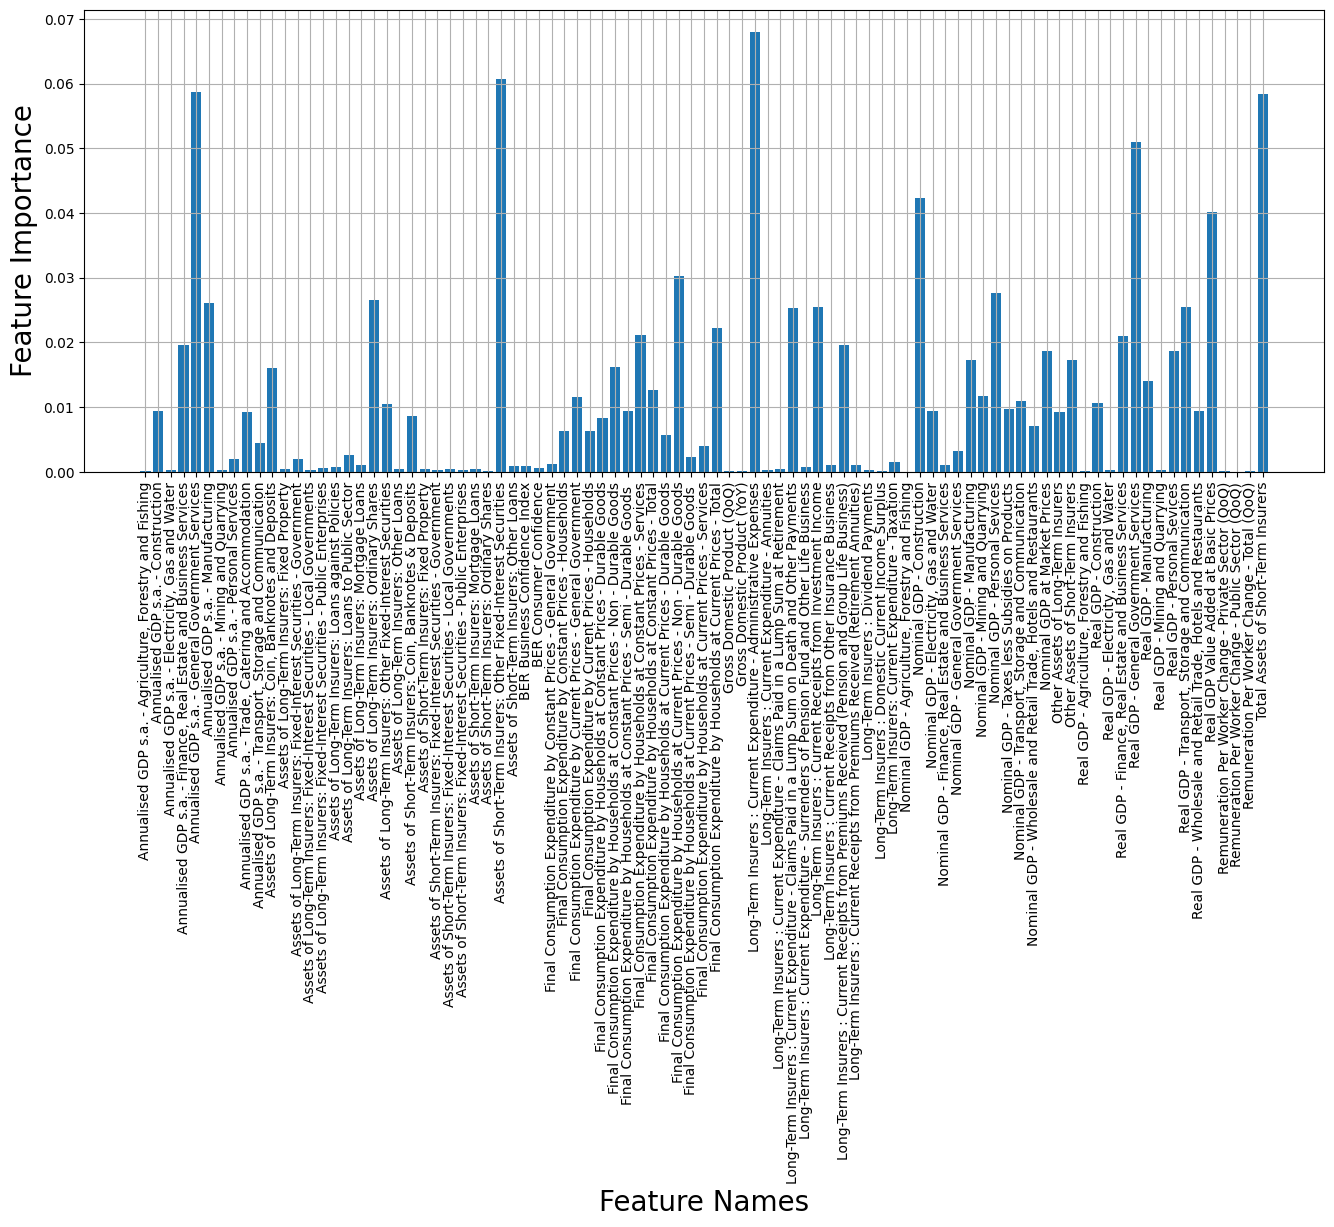

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the feature importances
plt.figure(figsize=(16,6))
plt.xticks(rotation= 'vertical')
plt.bar(X_train.columns, feature_importances)
plt.xlabel('Feature Names', size= 20) 
plt.ylabel('Feature Importance', size= 20)
plt.grid()
plt.show()


In [23]:
# Create a DataFrame to associate feature names with importances

imp_feature_df = pd.DataFrame({'Features': X_train.columns, 'importance': feature_importances})
imp_feature_df

Features  importance
0   Annualised GDP s.a. - Agriculture, Forestry an...    0.000036
1                  Annualised GDP s.a. - Construction    0.009419
2    Annualised GDP s.a. - Electricity, Gas and Water    0.000340
3   Annualised GDP s.a. - Finance, Real Estate and...    0.019539
4   Annualised GDP s.a. - General Government Services    0.058648
..                                                ...         ...
84               Real GDP Value Added at Basic Prices    0.040183
85  Remuneration Per Worker Change - Private Secto...    0.000044
86  Remuneration Per Worker Change - Public Sector...    0.000025
87       Remuneration Per Worker Change - Total (QoQ)    0.000071
88                Total Assets of Short-Term Insurers    0.058341

[89 rows x 2 columns]

#### Important features using 'feature importance'

In [24]:
# Important features using RF having importance > 0.04

rf_imp_features = imp_feature_df[imp_feature_df['importance'] >= 0.04]['Features']
rf_imp_features

4     Annualised GDP s.a. - General Government Services
28    Assets of Short-Term Insurers: Other Fixed-Int...
48    Long-Term Insurers : Current Expenditure - Adm...
61                           Nominal GDP - Construction
78               Real GDP - General Government Services
84                 Real GDP Value Added at Basic Prices
88                  Total Assets of Short-Term Insurers
Name: Features, dtype: object

In [100]:
len(rf_imp_features)

7

### 2. Pearson Correlation

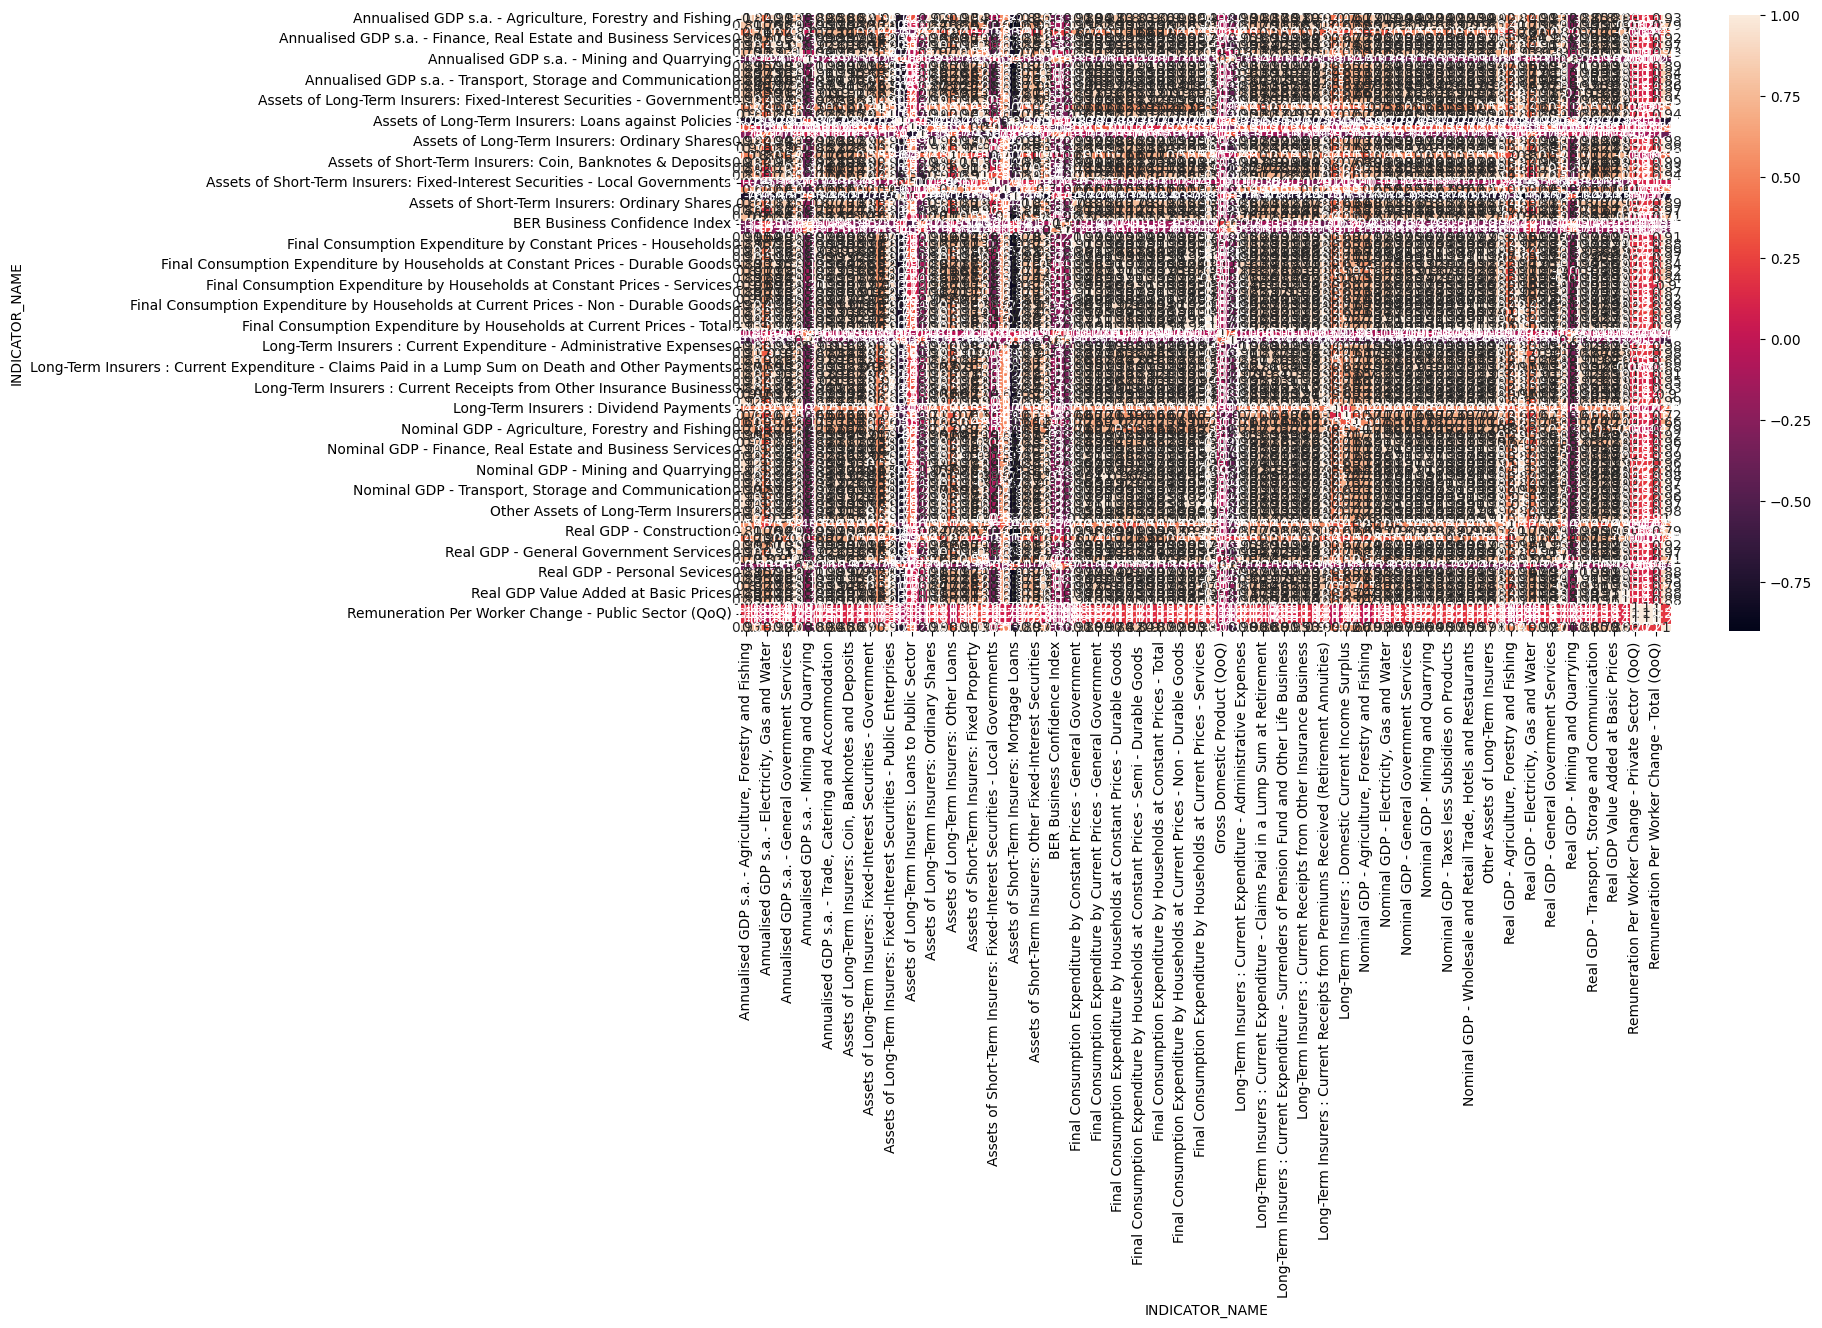

In [25]:
import seaborn as sns

plt.figure(figsize= (15,8))
sns.heatmap(df_quarterly.corr(), annot= True)
plt.show()

In [26]:
correlations = df_quarterly.corr()

threshold = 0.99

# Extract features with correlation higher than the threshold with the target
target_correlations = correlations['Real GDP at Market Prices']
highly_correlated_features = target_correlations[abs(target_correlations) > threshold].index.tolist()

# Remove the target feature from the list (if it's included)
if 'Real GDP at Market Prices' in highly_correlated_features:
    highly_correlated_features.remove('Real GDP at Market Prices')

# Extract the DataFrame with highly correlated features
selected_features_df = df_quarterly[highly_correlated_features]

In [27]:
# Name of features with correlation higher than 0.99 with Target 

selected_features_df.columns, len(selected_features_df.columns)

(Index(['Annualised GDP s.a. - Personal Services',
        'Annualised GDP s.a. - Trade, Catering and Accommodation',
        'Final Consumption Expenditure by Constant Prices - Households',
        'Final Consumption Expenditure by Households at Constant Prices - Services',
        'Final Consumption Expenditure by Households at Constant Prices - Total',
        'Real GDP - Transport, Storage and Communication',
        'Real GDP Value Added at Basic Prices'],
       dtype='object', name='INDICATOR_NAME'),
 7)

### 3. Using 'Recursive feature elimination' (RFE)

In [28]:
from sklearn.feature_selection import RFE

model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select= 7)

rfe.fit(X_train_scaled, y_train)

RFE(estimator=RandomForestRegressor(), n_features_to_select=7)

In [29]:
feature_ranking = rfe.ranking_
feature_ranking

array([75, 23, 65,  9,  2, 37, 68, 43, 32, 33, 20, 53, 40, 47, 62, 56, 45,
       60, 13,  1, 44, 50, 70, 78, 71, 64, 59, 79,  1, 80, 51, 58, 42, 17,
       31, 25, 57, 52, 16,  1, 15, 10,  5, 35, 36,  6, 77, 81,  1, 67, 54,
       66, 63, 48, 39, 41, 46, 74, 76, 72, 83, 34, 26, 29,  3, 38, 19,  8,
       27,  7, 18, 30, 14, 11, 82, 24, 55, 21, 28, 12, 49,  4,  1, 22,  1,
       73, 69, 61,  1])

### Comparing all the features (7) --- using different methods

In [30]:
# Getting feature names using RFE (masking) [RECURSIVE FEATURE EXTRACTION]

feature_names = X_train.columns

selected_features_mask = rfe.support_  # Boolean mask of selected features
rfe_imp_features = [feature_names[i] for i, is_selected in enumerate(selected_features_mask) if is_selected]

rfe_imp_features

['Assets of Long-Term Insurers: Other Fixed-Interest Securities',
 'Assets of Short-Term Insurers: Other Fixed-Interest Securities',
 'Final Consumption Expenditure by Households at Constant Prices - Services',
 'Long-Term Insurers : Current Expenditure - Administrative Expenses',
 'Real GDP - Transport, Storage and Communication',
 'Real GDP Value Added at Basic Prices',
 'Total Assets of Short-Term Insurers']

In [31]:
# Features selected using 'feature importance' of Random Forest

rf_imp_features

4     Annualised GDP s.a. - General Government Services
28    Assets of Short-Term Insurers: Other Fixed-Int...
48    Long-Term Insurers : Current Expenditure - Adm...
61                           Nominal GDP - Construction
78               Real GDP - General Government Services
84                 Real GDP Value Added at Basic Prices
88                  Total Assets of Short-Term Insurers
Name: Features, dtype: object

In [32]:
# Features selected using Pearson correlation

selected_features_df.columns

Index(['Annualised GDP s.a. - Personal Services',
       'Annualised GDP s.a. - Trade, Catering and Accommodation',
       'Final Consumption Expenditure by Constant Prices - Households',
       'Final Consumption Expenditure by Households at Constant Prices - Services',
       'Final Consumption Expenditure by Households at Constant Prices - Total',
       'Real GDP - Transport, Storage and Communication',
       'Real GDP Value Added at Basic Prices'],
      dtype='object', name='INDICATOR_NAME')

In [33]:
d = {}
for i in zip(X_train.columns, feature_ranking):
    d[i[0]] = i[1]

In [34]:
rfe_rank_df = pd.DataFrame({'Features' : d.keys(), 'RFE_rank': d.values()})
rfe_rank_df

Features  RFE_rank
0   Annualised GDP s.a. - Agriculture, Forestry an...        75
1                  Annualised GDP s.a. - Construction        23
2    Annualised GDP s.a. - Electricity, Gas and Water        65
3   Annualised GDP s.a. - Finance, Real Estate and...         9
4   Annualised GDP s.a. - General Government Services         2
..                                                ...       ...
84               Real GDP Value Added at Basic Prices         1
85  Remuneration Per Worker Change - Private Secto...        73
86  Remuneration Per Worker Change - Public Sector...        69
87       Remuneration Per Worker Change - Total (QoQ)        61
88                Total Assets of Short-Term Insurers         1

[89 rows x 2 columns]

### Comparison of features selected from different techniques VS All features

### 1. Base model

In [35]:
# Base Model

base_model = RandomForestRegressor(random_state= 42)
base_model.fit(X_train_scaled, y_train)

y_pred_base = base_model.predict(X_test_scaled)
y_pred_base, y_test

(array([1108926.54927166, 1116564.27649325, 1097929.20535258,
        1107537.68897647, 1113807.82821898, 1106771.90323979,
        1110109.38273793, 1110405.89650765, 1115824.14370463,
        1108730.23493397, 1109438.03302091, 1109795.20735839,
        1113033.27555123, 1108535.90590691, 1024155.90977873,
        1090698.39493478]),
 PERIOD
 2016-09-30    1.117489e+06
 2016-12-31    1.135304e+06
 2017-03-31    1.091113e+06
 2017-06-30    1.125688e+06
 2017-12-31    1.152378e+06
 2018-03-31    1.105005e+06
 2018-06-30    1.134992e+06
 2018-09-30    1.156398e+06
 2018-12-31    1.173837e+06
 2019-03-31    1.111361e+06
 2019-06-30    1.146265e+06
 2019-09-30    1.158118e+06
 2019-12-31    1.168357e+06
 2020-03-31    1.118596e+06
 2020-06-30    9.557532e+05
 2020-09-30    1.091730e+06
 Name: Real GDP at Market Prices, dtype: float64)

In [36]:
metrics_base = metrics(y_test, y_pred_base)
metrics_base

{'MSE': 1245706210.3790836,
 'RMSE': 35294.56346775072,
 'R-squared': 0.49065570696855076,
 'MAPE': 2.486281275871026}

### 2. Using 'feature importance' features

In [37]:
X_fi = X[rf_imp_features]

X_train_fi, X_test_fi = X_fi[:-16], X_fi[-16:]

sc_fi = StandardScaler()
X_train_fi_scaled = sc_fi.fit_transform(X_train_fi)
X_test_fi_scaled = sc_fi.transform(X_test_fi)

In [38]:
model_fi = RandomForestRegressor(random_state= 42)
model_fi.fit(X_train_fi_scaled, y_train)

y_pred_fi = model_fi.predict(X_test_fi_scaled)
y_pred_fi

array([1119901.23416951, 1121975.72575173, 1093469.11047914,
       1122176.17359017, 1121975.72575173, 1110236.43314171,
       1122176.17359017, 1121977.32490204, 1121977.32490204,
       1113809.52881206, 1122176.17359017, 1121977.32490204,
       1122054.02819808, 1121456.27088591, 1022682.88974628,
       1098565.7474268 ])

In [39]:
metrics_fi = metrics(y_test, y_pred_fi)
metrics_fi

{'MSE': 860149850.2935495,
 'RMSE': 29328.311412243795,
 'R-squared': 0.6483019722077552,
 'MAPE': 1.927707287610625}

### 3. Using 'Recursive Feature Elimination' (RFE) features

In [40]:
rfe_imp_features

['Assets of Long-Term Insurers: Other Fixed-Interest Securities',
 'Assets of Short-Term Insurers: Other Fixed-Interest Securities',
 'Final Consumption Expenditure by Households at Constant Prices - Services',
 'Long-Term Insurers : Current Expenditure - Administrative Expenses',
 'Real GDP - Transport, Storage and Communication',
 'Real GDP Value Added at Basic Prices',
 'Total Assets of Short-Term Insurers']

In [41]:
X_rfe = X[rfe_imp_features]

X_train_rfe, X_test_rfe = X_rfe[:-16], X_rfe[-16:]

sc_rfe = StandardScaler()
X_train_rfe_scaled = sc_rfe.fit_transform(X_train_rfe)
X_test_rfe_scaled = sc_rfe.transform(X_test_rfe)

In [42]:
model_rfe = RandomForestRegressor(random_state= 42)
model_rfe.fit(X_train_rfe_scaled, y_train)

y_pred_rfe = model_rfe.predict(X_test_rfe_scaled)
y_pred_rfe, y_test

(array([1121657.17519348, 1122848.34612935, 1094191.44408885,
        1123072.25148603, 1122848.34612935, 1114394.08131967,
        1120399.54882917, 1122848.34612935, 1122848.34612935,
        1116938.75407041, 1122848.34612935, 1122848.34612935,
        1122848.34612935, 1114271.5347792 ,  996841.65490089,
        1088958.73647659]),
 PERIOD
 2016-09-30    1.117489e+06
 2016-12-31    1.135304e+06
 2017-03-31    1.091113e+06
 2017-06-30    1.125688e+06
 2017-12-31    1.152378e+06
 2018-03-31    1.105005e+06
 2018-06-30    1.134992e+06
 2018-09-30    1.156398e+06
 2018-12-31    1.173837e+06
 2019-03-31    1.111361e+06
 2019-06-30    1.146265e+06
 2019-09-30    1.158118e+06
 2019-12-31    1.168357e+06
 2020-03-31    1.118596e+06
 2020-06-30    9.557532e+05
 2020-09-30    1.091730e+06
 Name: Real GDP at Market Prices, dtype: float64)

In [43]:
metrics_rfe = metrics(y_test, y_pred_rfe)
metrics_rfe

{'MSE': 668530450.4790735,
 'RMSE': 25855.955802852724,
 'R-squared': 0.726651302825537,
 'MAPE': 1.7720185681343634}

## Results

In [44]:
metrics_base

{'MSE': 1245706210.3790836,
 'RMSE': 35294.56346775072,
 'R-squared': 0.49065570696855076,
 'MAPE': 2.486281275871026}

In [45]:
metrics_fi

{'MSE': 860149850.2935495,
 'RMSE': 29328.311412243795,
 'R-squared': 0.6483019722077552,
 'MAPE': 1.927707287610625}

In [46]:
metrics_rfe

{'MSE': 668530450.4790735,
 'RMSE': 25855.955802852724,
 'R-squared': 0.726651302825537,
 'MAPE': 1.7720185681343634}

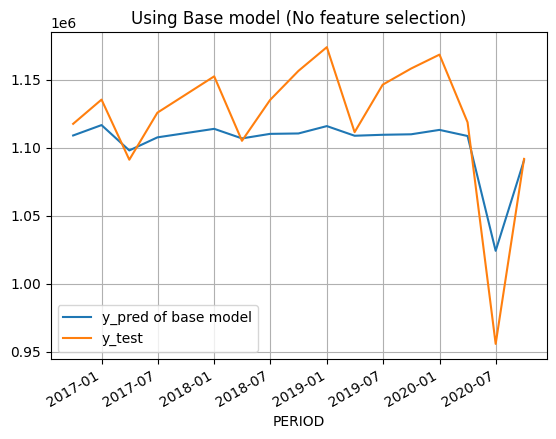

In [47]:
y_pred_base = pd.Series(y_pred_base, index= y_test.index)

y_pred_base.plot(label= 'y_pred of base model')
y_test.plot(label= 'y_test')
plt.legend()
plt.grid()
plt.title('Using Base model (No feature selection)')
plt.show()

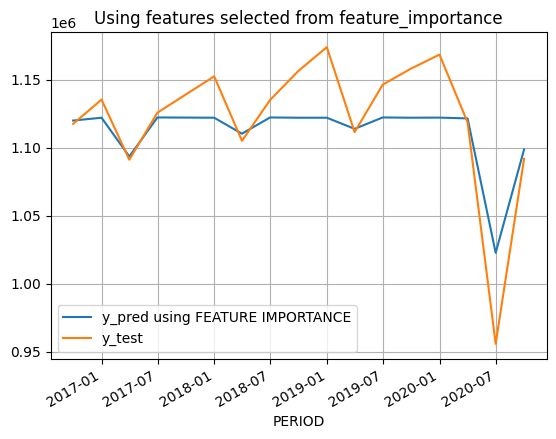

In [48]:
y_pred_fi = pd.Series(y_pred_fi, index= y_test.index)

y_pred_fi.plot(label= 'y_pred using FEATURE IMPORTANCE')
y_test.plot(label= 'y_test')
plt.legend()
plt.grid()
plt.title('Using features selected from feature_importance')
plt.show()

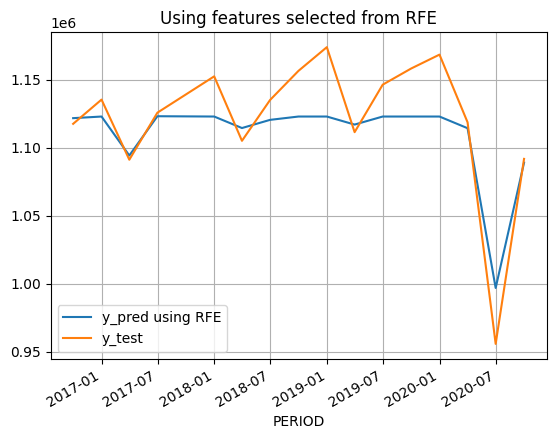

In [49]:
y_pred_rfe = pd.Series(y_pred_rfe, index= y_test.index)

y_pred_rfe.plot(label= 'y_pred using RFE')
y_test.plot(label= 'y_test')
plt.legend()
plt.grid()
plt.title('Using features selected from RFE')
plt.show()

In [50]:
y_train

PERIOD
1994-03-31    5.712114e+05
1994-06-30    5.964396e+05
1994-09-30    6.063746e+05
1994-12-31    6.152152e+05
1995-03-31    5.940184e+05
                  ...     
2015-06-30    1.099417e+06
2015-09-30    1.107572e+06
2015-12-31    1.129962e+06
2016-03-31    1.083941e+06
2016-06-30    1.113437e+06
Name: Real GDP at Market Prices, Length: 90, dtype: float64

In [51]:
y_test

PERIOD
2016-09-30    1.117489e+06
2016-12-31    1.135304e+06
2017-03-31    1.091113e+06
2017-06-30    1.125688e+06
2017-12-31    1.152378e+06
2018-03-31    1.105005e+06
2018-06-30    1.134992e+06
2018-09-30    1.156398e+06
2018-12-31    1.173837e+06
2019-03-31    1.111361e+06
2019-06-30    1.146265e+06
2019-09-30    1.158118e+06
2019-12-31    1.168357e+06
2020-03-31    1.118596e+06
2020-06-30    9.557532e+05
2020-09-30    1.091730e+06
Name: Real GDP at Market Prices, dtype: float64

In [52]:
X_test_scaled[0].shape, len(X_test_scaled[0,:])

((89,), 89)

In [53]:
import statsmodels.api as sm

X_train_scaled = sm.add_constant(X_train_scaled)
model_linear = sm.OLS(y_train, X_train_scaled)
results = model_linear.fit()

In [54]:
coeffecients = results.params

for i in zip(coeffecients.index, coeffecients):
    print(i)

('const', 851531.572961255)
('x1', -925.135225095757)
('x2', -22950.87497382937)
('x3', 5380.273727789405)
('x4', 13344.921497945092)
('x5', 9440.274395076558)
('x6', -4511.860517415305)
('x7', 1768.1417378950136)
('x8', -4540.04126858199)
('x9', 5793.63620229729)
('x10', -1968.5960446952377)
('x11', -153.66644706425723)
('x12', -71.98101060706904)
('x13', -310.5056606999715)
('x14', 1067.776330504843)
('x15', -521.5734341493662)
('x16', -1281.3179927401507)
('x17', -1139.7653154355066)
('x18', -163.8576958252088)
('x19', 8487.494289266644)
('x20', -7734.483177140821)
('x21', -2100.8919666847796)
('x22', 16687.10503006616)
('x23', -133.75196469748334)
('x24', 3295.1351775380563)
('x25', 1105.243841957199)
('x26', 1788.1161945651693)
('x27', 929.0736431862679)
('x28', 950.0850749238743)
('x29', 4920.193923271203)
('x30', 2111.8824631297757)
('x31', -1118.7424256265658)
('x32', -198.02207916598127)
('x33', 8416.187511746364)
('x34', 10721.141751032788)
('x35', -56503.78209353192)
('x36',

In [55]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Real GDP at Market Prices   R-squared:                       1.000
Model:                                   OLS   Adj. R-squared:                  1.000
Method:                        Least Squares   F-statistic:                 1.136e+05
Date:                       Tue, 17 Oct 2023   Prob (F-statistic):           8.80e-06
Time:                               12:08:02   Log-Likelihood:                -518.85
No. Observations:                         90   AIC:                             1214.
Df Residuals:                              2   BIC:                             1434.
Df Model:                                 87                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.515e+05     54.569   1.56e+04      0.000    8.51e+05    8.52e+05
x1          -925.1352   1267.476     -0.730      0.541   -6378.644    4528.374
x2         -2.295e+04   2.28e+04     -1.006      0.420   -1.21e+05    7.52e+04
x3          5380.2737   4890.339      1.100      0.386   -1.57e+04    2.64e+04
x4          1.334e+04   2.46e+04      0.543      0.641   -9.23e+04    1.19e+05
x5          9440.2744   3.33e+04      0.283      0.804   -1.34e+05    1.53e+05
x6         -4511.8605   8467.160     -0.533      0.647   -4.09e+04    3.19e+04
x7          1768.1417   1259.613      1.404      0.296   -3651.537    7187.820
x8         -4540.0413   1.11e+04     -0.407      0.723   -5.25e+04    4.34e+04
x9          5793.6362   1.06e+04      0.546      0.640   -3.98e+04    5.14e+04
x10        -1968.5960   1.85e+04     -0.106      0.925   -8.15e+04    7.76e+04
x11         -153.6664   4600.628     -0.033      0.976   -1.99e+04    1.96e+04
x12          -71.9810   2057.970     -0.035      0.975   -8926.710    8782.748
x13         -310.5057   3197.327     -0.097      0.931   -1.41e+04    1.34e+04
x14         1067.7763    862.601      1.238      0.341   -2643.696    4779.249
x15         -521.5734   3193.564     -0.163      0.885   -1.43e+04    1.32e+04
x16        -1281.3180   1329.073     -0.964      0.437   -6999.856    4437.220
x17        -1139.7653   1196.150     -0.953      0.441   -6286.383    4006.853
x18         -163.8577   1701.152     -0.096      0.932   -7483.323    7155.608
x19         8487.4943   1.58e+04      0.538      0.644   -5.94e+04    7.63e+04
x20        -7734.4832   1.14e+04     -0.677      0.568   -5.69e+04    4.14e+04
x21        -2100.8920   9042.011     -0.232      0.838    -4.1e+04    3.68e+04
x22         1.669e+04   1.93e+04      0.865      0.478   -6.63e+04    9.97e+04
x23         -133.7520   3294.498     -0.041      0.971   -1.43e+04     1.4e+04
x24         3295.1352   2820.647      1.168      0.363   -8841.129    1.54e+04
x25         1105.2438    738.692      1.496      0.273   -2073.091    4283.579
x26         1788.1162   1036.851      1.725      0.227   -2673.092    6249.325
x27          929.0736   1290.880      0.720      0.546   -4625.133    6483.281
x28          950.0851   4182.859      0.227      0.841    -1.7e+04    1.89e+04
x29         4920.1939   2791.396      1.763      0.220   -7090.214    1.69e+04
x30         2111.8825   1584.826      1.333      0.314   -4707.073    8930.838
x31        -1118.7424   1065.365     -1.050      0.404   -5702.640    3465.155
x32         -198.0221    360.129     -0.550      0.638   -1747.531    1351.487
x33         8416.1875   6480.185      1.299      0.324   -1.95e+04    3.63e+04
x34         1.072e+04   2.17e+04      0.494      0.670   -8.26e+04    1.04e+05
x35 

In [56]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [57]:
lr.coef_

array([-6.09692265e+15, -1.86223809e+03, -3.19816437e+04,  7.09230331e+03,
        1.58349976e+04,  2.09086421e+04, -4.23420326e+03,  1.24346349e+03,
       -4.48674663e+03,  1.87351333e+03,  1.00565727e+01,  4.04417462e+02,
       -1.68634795e+03, -3.13812923e+01,  1.07003758e+03, -2.66967135e+02,
       -1.76373705e+03, -8.85699965e+02, -6.95770488e+01,  1.19762113e+04,
       -7.10291554e+03, -1.73077843e+03,  2.06509088e+04,  3.25621708e+02,
        2.89596469e+03,  1.10399757e+03,  1.73956048e+03,  1.35793362e+03,
        1.03263733e+03,  5.90832171e+03,  1.18543029e+03, -1.59425654e+03,
       -3.41793198e+02,  8.93859650e+03,  2.01183759e+04, -6.36653401e+04,
        4.91368501e+07, -7.69956015e+03, -3.56979068e+03,  1.32152090e+03,
        1.22329709e+04,  2.01183766e+04, -9.88530723e+06, -3.03083404e+07,
       -8.37100579e+06, -5.01543444e+07,  4.91368501e+07,  7.48444146e+02,
        7.70659972e+02,  1.16645219e+05,  1.18310177e+05,  1.42003221e+05,
        3.39614468e+05,  

In [58]:
lr.intercept_

6096922654904629.0

## Dynamic Factor model (DFM)

In [59]:
import statsmodels.tsa.api as sm

In [60]:
df_dfm = df_quarterly

In [61]:
# Instantiate our model
model_dfm = sm.DynamicFactorMQ(endog= df_dfm, factors= 2, factor_orders=1, idiosyncratic_ar1=True)

# Fit the DFM
results_dfm = model_dfm.fit(maxiter=100, disp=True)

c:\Users\himanshu.verma\anaconda3\envs\time_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\himanshu.verma\anaconda3\envs\time_env\Lib\site-packages\statsmodels\tsa\statespace\dynamic_factor_mq.py:1870: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd.DataFrame(self.endog).interpolate().fillna(method='backfill'),
c:\Users\himanshu.verma\anaconda3\envs\time_env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


EM start iterations, llf=2561.1
EM iteration 2, llf=2896.1, convergence criterion=0.12278
EM iteration 3, llf=2962.8, convergence criterion=0.022747
EM iteration 4, llf=2987.8, convergence criterion=0.0084111
EM iteration 5, llf=2996.9, convergence criterion=0.0030249
EM iteration 6, llf=2999.8, convergence criterion=0.00097761
EM iteration 7, llf=3000.7, convergence criterion=0.00030553
EM iteration 8, llf=3001, convergence criterion=0.00010123
EM iteration 9, llf=3001.1, convergence criterion=3.8678e-05
EM iteration 10, llf=3001.2, convergence criterion=1.8141e-05
EM iteration 11, llf=3001.2, convergence criterion=1.0524e-05
EM iteration 12, llf=3001.2, convergence criterion=7.1836e-06
EM iteration 13, llf=3001.3, convergence criterion=5.4176e-06
EM iteration 14, llf=3001.3, convergence criterion=4.32e-06
EM iteration 15, llf=3001.3, convergence criterion=3.5567e-06
EM iteration 16, llf=3001.3, convergence criterion=2.9884e-06
EM iteration 17, llf=3001.3, convergence criterion=2.5476

In [62]:
results_dfm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        Dynamic Factor Results                                        
======================================================================================================
Dep. Variable:     "Annualised GDP s.a. - Ag...", and 89 more   No. Observations:                  106
Model:                                   Dynamic Factor Model   Log Likelihood                3001.330
                                      + 2 factors in 2 blocks   AIC                          -5274.660
                                        + AR(1) idiosyncratic   BIC                          -4305.168
Date:                                        Tue, 17 Oct 2023   HQIC                         -4881.720
Time:                                                12:08:06   EM Iterations                       25
Sample:                                                     0                                         
                                                        - 106                                         
Covariance Type:                                 Not computed                                         
                                Observation equation:                                
=====================================================================================
           Factor loadings:          0          1    idiosyncratic: AR(1)        var.
-------------------------------------------------------------------------------------
Annualised GDP s.a. - Ag...       0.11       0.02                    0.58        0.08
Annualised GDP s.a. - Co...       0.11      -0.05                    0.98        0.00
Annualised GDP s.a. - El...       0.07      -0.12                    0.90        0.02
Annualised GDP s.a. - Fi...       0.12      -0.02                    0.97        0.00
Annualised GDP s.a. - Ge...       0.12       0.02                    0.96        0.00
Annualised GDP s.a. - Ma...       0.11      -0.07                    0.39        0.03
Annualised GDP s.a. - Mi...      -0.04      -0.04                    0.41        0.68
Annualised GDP s.a. - Pe...       0.12      -0.03                    0.88        0.00
Annualised GDP s.a. - Tr...       0.12      -0.04                    0.57        0.01
Annualised GDP s.a. - Tr...       0.12      -0.04                    0.93        0.00
Assets of Long-Term Insu...       0.12      -0.03                    0.85        0.02
Assets of Long-Term Insu...       0.11      -0.01                    0.83        0.05
Assets of Long-Term Insu...       0.12       0.02                    0.82        0.03
Assets of Long-Term Insu...       0.08      -0.02                    0.79        0.20
Assets of Long-Term Insu...       0.11       0.03                    0.84        0.02
Assets of Long-Term Insu...      -0.10       0.01                    0.81        0.09
Assets of Long-Term Insu...       0.03       0.11                    0.92        0.10
Assets of Long-Term Insu...      -0.02      -0.12                    0.74        0.18
Assets of Long-Term Insu...       0.12       0.03                    0.82        0.01
Assets of Long-Term Insu...       0.11       0.05                    0.93        0.01
Assets of Long-Term Insu...       0.08      -0.10                    0.88        0.06
Assets of Short-Term Ins...       0.12       0.03                    0.91        0.01
Assets of Short-Term Ins...       0.10       0.07                    0.89        0.03
Assets of Short-Term Ins...       0.10       0.08                    0.63        0.04
Assets of Short-Term Ins...      -0.02       0.12                    0.72        0.21
Assets of Short-Term Ins...       0.08      -0.03                    0.84        0.17
Assets of Short-Term Ins...      -0.10       0.04                    0.82        0.08
Assets of Short-Term Ins...       0.10       0.03                    0.86        0.06
Assets of Short-Term Ins...       0.11       0.07                  

## K-Means with 'DTW'

In [63]:
%matplotlib inline
from tslearn.clustering import silhouette_score
plt.rcParams['figure.figsize'] = [25, 8]

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [64]:
# X_train_scaled_kmean.shape, X_test_scaled_kmean.shape

In [65]:
X_dtw = df_quarterly.drop(columns= ['Real GDP at Market Prices'])
y_dtw = df_quarterly['Real GDP at Market Prices']

In [66]:
X_dtw.shape, X_dtw.T.shape

((106, 89), (89, 106))

In [67]:
y_dtw.shape, y_dtw.T.shape

((106,), (106,))

In [68]:
X_dtw.head()

INDICATOR_NAME  Annualised GDP s.a. - Agriculture, Forestry and Fishing  \
PERIOD                                                                    
1994-03-31                                           64026.620653         
1994-06-30                                           64285.022588         
1994-09-30                                           65254.419647         
1994-12-31                                           70536.027319         
1995-03-31                                           62672.092732         

INDICATOR_NAME  Annualised GDP s.a. - Construction  \
PERIOD                                               
1994-03-31                            57342.366141   
1994-06-30                            57751.530606   
1994-09-30                            58426.977602   
1994-12-31                            59286.711112   
1995-03-31                            59943.629527   

INDICATOR_NAME  Annualised GDP s.a. - Electricity, Gas and Water  \
PERIOD                                                             
1994-03-31                                          87523.336250   
1994-06-30                                          89086.502788   
1994-09-30                                          89584.140443   
1994-12-31                                          89808.199882   
1995-03-31                                          91324.478175   

INDICATOR_NAME  Annualised GDP s.a. - Finance, Real Estate and Business Services  \
PERIOD                                                                             
1994-03-31                                          354152.560074                  
1994-06-30                                          359991.380964                  
1994-09-30                                          364604.665397                  
1994-12-31                                          368657.244322                  
1995-03-31                                          370782.772317                  

INDICATOR_NAME  Annualised GDP s.a. - General Government Services  \
PERIOD                                                              
1994-03-31                                          227628.430585   
1994-06-30                                          228597.901869   
1994-09-30                                          229647.447559   
1994-12-31                                          231057.327732   
1995-03-31                                          230882.880218   

INDICATOR_NAME  Annualised GDP s.a. - Manufacturing  \
PERIOD                                                
1994-03-31                            337649.493638   
1994-06-30                            339889.100966   
1994-09-30                            345744.630827   
1994-12-31                            357123.695375   
1995-03-31                            363229.334118   

INDICATOR_NAME  Annualised GDP s.a. - Mining and Quarrying  \
PERIOD                                                       
1994-03-31                                   231749.140782   
1994-06-30                                   231938.641217   
1994-09-30                                   231706.983098   
1994-12-31                                   231543.267404   
1995-03-31                                   227403.568520   

INDICATOR_NAME  Annualised GDP s.a. - Personal Services  \
PERIOD                                                    
1994-03-31                                342888.272293   
1994-06-30                                349376.731168   
1994-09-30                                355656.745711   
1994-12-31                                363212.784466   
1995-03-31                                365684.861574   

INDICATOR_NAME  Annualised GDP s.a. - Trade, Catering and Accommodation  \
PERIOD                                                                    
1994-03-31                                          264449.365227         
1994-06-30                                          265495.709238         
1994-09-30

In [69]:
X_dtw.T.head()

PERIOD                                                 1994-03-31  \
INDICATOR_NAME                                                      
Annualised GDP s.a. - Agriculture, Forestry and...   64026.620653   
Annualised GDP s.a. - Construction                   57342.366141   
Annualised GDP s.a. - Electricity, Gas and Water     87523.336250   
Annualised GDP s.a. - Finance, Real Estate and ...  354152.560074   
Annualised GDP s.a. - General Government Services   227628.430585   

PERIOD                                                 1994-06-30  \
INDICATOR_NAME                                                      
Annualised GDP s.a. - Agriculture, Forestry and...   64285.022588   
Annualised GDP s.a. - Construction                   57751.530606   
Annualised GDP s.a. - Electricity, Gas and Water     89086.502788   
Annualised GDP s.a. - Finance, Real Estate and ...  359991.380964   
Annualised GDP s.a. - General Government Services   228597.901869   

PERIOD                                                 1994-09-30  \
INDICATOR_NAME                                                      
Annualised GDP s.a. - Agriculture, Forestry and...   65254.419647   
Annualised GDP s.a. - Construction                   58426.977602   
Annualised GDP s.a. - Electricity, Gas and Water     89584.140443   
Annualised GDP s.a. - Finance, Real Estate and ...  364604.665397   
Annualised GDP s.a. - General Government Services   229647.447559   

PERIOD                                                 1994-12-31  \
INDICATOR_NAME                                                      
Annualised GDP s.a. - Agriculture, Forestry and...   70536.027319   
Annualised GDP s.a. - Construction                   59286.711112   
Annualised GDP s.a. - Electricity, Gas and Water     89808.199882   
Annualised GDP s.a. - Finance, Real Estate and ...  368657.244322   
Annualised GDP s.a. - General Government Services   231057.327732   

PERIOD                                                 1995-03-31  \
INDICATOR_NAME                                                      
Annualised GDP s.a. - Agriculture, Forestry and...   62672.092732   
Annualised GDP s.a. - Construction                   59943.629527   
Annualised GDP s.a. - Electricity, Gas and Water     91324.478175   
Annualised GDP s.a. - Finance, Real Estate and ...  370782.772317   
Annualised GDP s.a. - General Government Services   230882.880218   

PERIOD                                                 1995-06-30  \
INDICATOR_NAME                                                      
Annualised GDP s.a. - Agriculture, Forestry and...   52991.944707   
Annualised GDP s.a. - Construction                   60003.472365   
Annualised GDP s.a. - Electricity, Gas and Water     91360.848655   
Annualised GDP s.a. - Finance, Real Estate and ...  373060.758156   
Annualised GDP s.a. - General Government Services   231091.645367   

PERIOD                                                 1995-09-30  \
INDICATOR_NAME                                                      
Annualised GDP s.a. - Agriculture, Forestry and...   47926.647222   
Annualised GDP s.a. - Construction                   60439.013001   
Annualised GDP s.a. - Electricity, Gas and Water     90802.254324   
Annualised GDP s.a. - Finance, Real Estate and ...  376124.159560   
Annualised GDP s.a. - General Government Services   231257.513469   

PERIOD                                                 1995-12-31  \
INDICATOR_NAME                                                      
Annualised GDP s.a. - Agriculture, Forestry and...   47955.089594   
Annualised GDP s.a. - Construction                   60683.539334   
Annualised GDP s.a. - Electricity, Gas and Water     89634.641795   
Annualised GDP s.a. - Finance, Real Estate and ...  378202.924277   
Annualised GDP s.a. - General Government Services   231420.521561   

PERIOD                                                 1996-03-31  \
INDICATOR_NAME                                             

In [70]:
X_dtw_train , y_dtw_train = X_dtw[:-16], y_dtw[:-16]
X_dtw_test , y_dtw_test = X_dtw[-16:], y_dtw[-16:]

In [71]:
X_dtw_train.shape, X_dtw_test.shape

((90, 89), (16, 89))

In [72]:
sc_dtw = TimeSeriesScalerMeanVariance()

X_dtw_train_scaled = sc_dtw.fit_transform(X_dtw_train)
X_dtw_test_scaled = sc_dtw.transform(X_dtw_test)

In [73]:
X_dtw_train_scaled.shape

(90, 89, 1)

In [74]:
X_dtw_train_scaled[0].shape

(89, 1)

In [75]:
# df_test = pd.DataFrame(X_dtw_train_scaled, index = X_dtw_train.index, columns= X_dtw_train.columns)

In [76]:
# X_dtw_train_scaled = pd.DataFrame(X_dtw_train_scaled, index =X_dtw_train.index , columns= X_dtw_train.columns)
# X_dtw_test_scaled = pd.DataFrame(X_dtw_test_scaled, index =X_dtw_test.index , columns= X_dtw_test.columns)

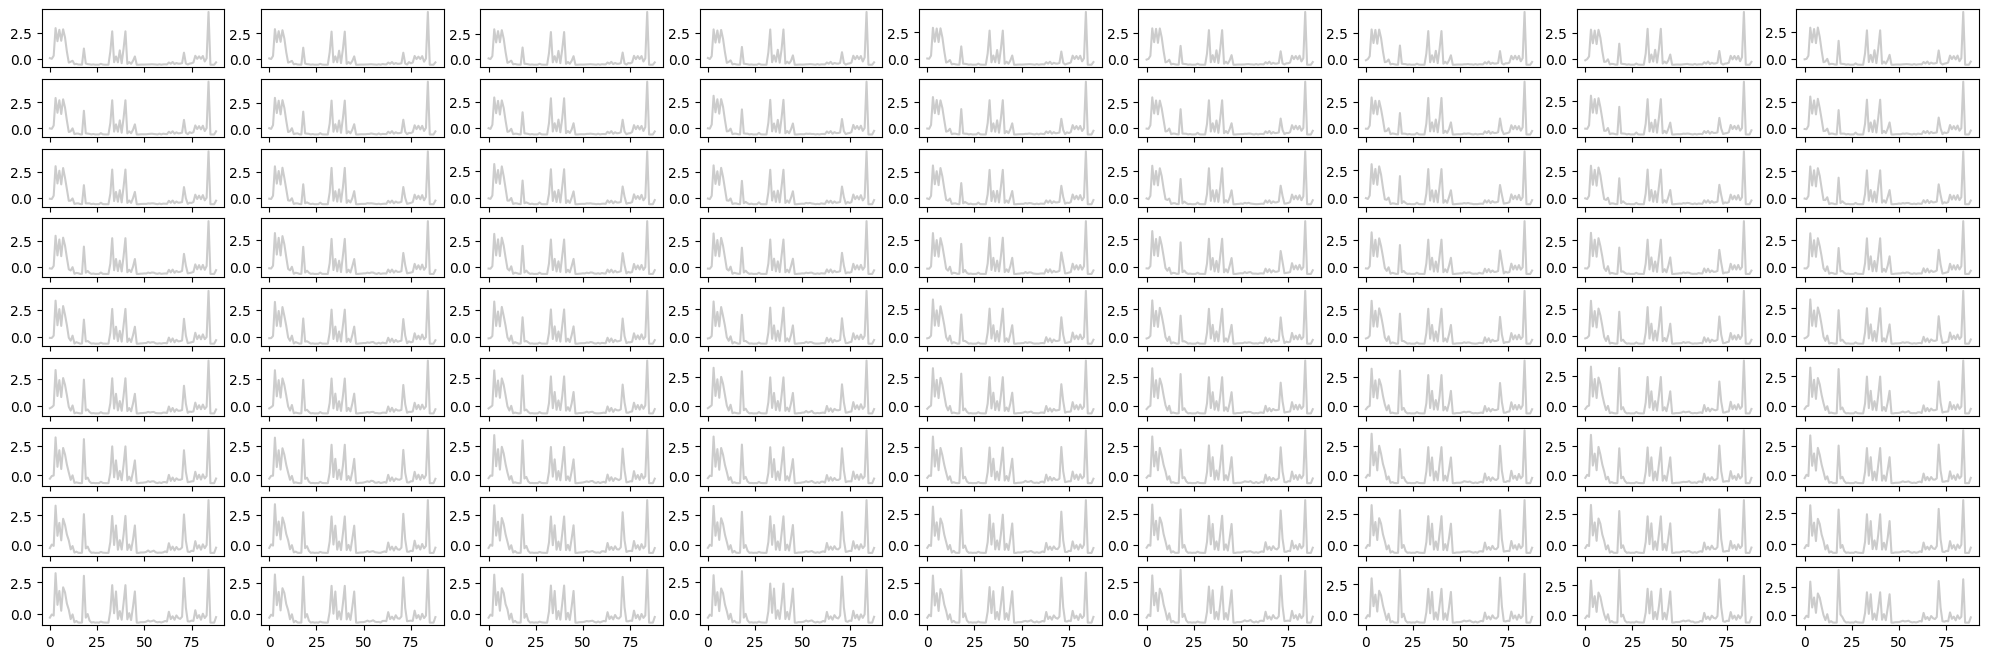

In [77]:
for i in range(81):
    plt.subplot(9, 9, i + 1)
    plt.plot(X_dtw_train_scaled[i].ravel(), "k-", alpha=.2)

In [78]:
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = TimeSeriesKMeans(n_clusters=k,
                          metric="dtw",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=0)
    
    km = km.fit(X_dtw_train_scaled)
    Sum_of_squared_distances.append(km.inertia_)

In [79]:
for i in zip(K, Sum_of_squared_distances):
    print(i)

(1, 3.820140741913551)
(2, 1.1658956134040226)
(3, 0.6994005409529256)
(4, 0.3850921312773779)
(5, 0.2818464544942928)
(6, 0.23438628340874973)
(7, 0.19770986983354844)


In [80]:
d = {key:val for key, val in zip(K, Sum_of_squared_distances)}
d

{1: 3.820140741913551,
 2: 1.1658956134040226,
 3: 0.6994005409529256,
 4: 0.3850921312773779,
 5: 0.2818464544942928,
 6: 0.23438628340874973,
 7: 0.19770986983354844}

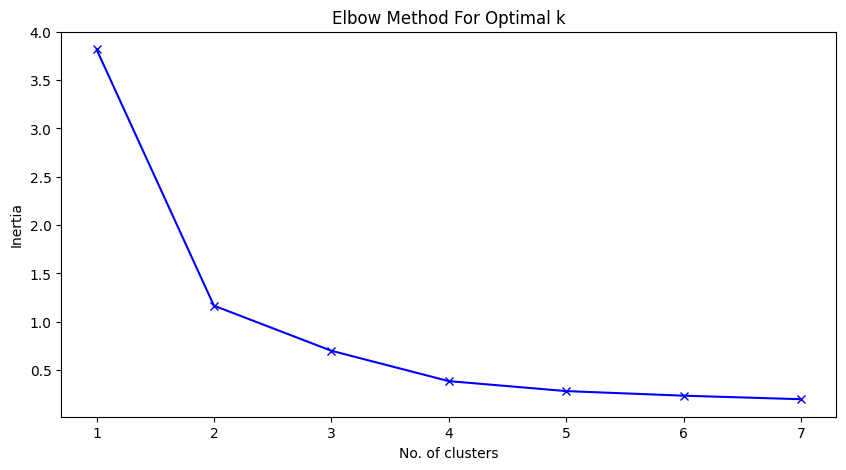

In [81]:
plt.figure(figsize= (10,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [82]:
from sklearn.cluster import KMeans
from tslearn.clustering import silhouette_score
import numpy as np

# Sample data (replace with your own data)
data = X_dtw_train

# Specify a range of cluster numbers to try
cluster_range = range(2, 16)

best_score = -1  # Initialize with a low value
best_num_clusters = None

for num_clusters in cluster_range:
    kmeans = TimeSeriesKMeans(n_clusters=num_clusters, random_state=0, metric= 'dtw')
    cluster_labels = kmeans.fit_predict(data)
    
    # Calculate the silhouette score for this clustering
    score = silhouette_score(data, cluster_labels)
    
    print(f"Number of clusters: {num_clusters}, Silhouette Score: {score}")
    
    # Update the best number of clusters if the score is higher
    if score > best_score:
        best_score = score
        best_num_clusters = num_clusters

print(f"Best number of clusters: {best_num_clusters}, Best Silhouette Score: {best_score}")


Number of clusters: 2, Silhouette Score: 0.623896676451769
Number of clusters: 3, Silhouette Score: 0.5967760134163277
Number of clusters: 4, Silhouette Score: 0.5445063897525487
Number of clusters: 5, Silhouette Score: 0.5275917647073269
Number of clusters: 6, Silhouette Score: 0.5139026635929688
Number of clusters: 7, Silhouette Score: 0.49184557013888297
Number of clusters: 8, Silhouette Score: 0.44830239641263814
Number of clusters: 9, Silhouette Score: 0.4113106139993118
Number of clusters: 10, Silhouette Score: 0.413000121966214
Number of clusters: 11, Silhouette Score: 0.39393060421740594
Number of clusters: 12, Silhouette Score: 0.39618717930830044
Number of clusters: 13, Silhouette Score: 0.4006690241375766
Number of clusters: 14, Silhouette Score: 0.3810217764681821
Number of clusters: 15, Silhouette Score: 0.3799202167656564
Best number of clusters: 2, Best Silhouette Score: 0.623896676451769


In [83]:
X_dtw_train.head()

INDICATOR_NAME  Annualised GDP s.a. - Agriculture, Forestry and Fishing  \
PERIOD                                                                    
1994-03-31                                           64026.620653         
1994-06-30                                           64285.022588         
1994-09-30                                           65254.419647         
1994-12-31                                           70536.027319         
1995-03-31                                           62672.092732         

INDICATOR_NAME  Annualised GDP s.a. - Construction  \
PERIOD                                               
1994-03-31                            57342.366141   
1994-06-30                            57751.530606   
1994-09-30                            58426.977602   
1994-12-31                            59286.711112   
1995-03-31                            59943.629527   

INDICATOR_NAME  Annualised GDP s.a. - Electricity, Gas and Water  \
PERIOD                                                             
1994-03-31                                          87523.336250   
1994-06-30                                          89086.502788   
1994-09-30                                          89584.140443   
1994-12-31                                          89808.199882   
1995-03-31                                          91324.478175   

INDICATOR_NAME  Annualised GDP s.a. - Finance, Real Estate and Business Services  \
PERIOD                                                                             
1994-03-31                                          354152.560074                  
1994-06-30                                          359991.380964                  
1994-09-30                                          364604.665397                  
1994-12-31                                          368657.244322                  
1995-03-31                                          370782.772317                  

INDICATOR_NAME  Annualised GDP s.a. - General Government Services  \
PERIOD                                                              
1994-03-31                                          227628.430585   
1994-06-30                                          228597.901869   
1994-09-30                                          229647.447559   
1994-12-31                                          231057.327732   
1995-03-31                                          230882.880218   

INDICATOR_NAME  Annualised GDP s.a. - Manufacturing  \
PERIOD                                                
1994-03-31                            337649.493638   
1994-06-30                            339889.100966   
1994-09-30                            345744.630827   
1994-12-31                            357123.695375   
1995-03-31                            363229.334118   

INDICATOR_NAME  Annualised GDP s.a. - Mining and Quarrying  \
PERIOD                                                       
1994-03-31                                   231749.140782   
1994-06-30                                   231938.641217   
1994-09-30                                   231706.983098   
1994-12-31                                   231543.267404   
1995-03-31                                   227403.568520   

INDICATOR_NAME  Annualised GDP s.a. - Personal Services  \
PERIOD                                                    
1994-03-31                                342888.272293   
1994-06-30                                349376.731168   
1994-09-30                                355656.745711   
1994-12-31                                363212.784466   
1995-03-31                                365684.861574   

INDICATOR_NAME  Annualised GDP s.a. - Trade, Catering and Accommodation  \
PERIOD                                                                    
1994-03-31                                          264449.365227         
1994-06-30                                          265495.709238         
1994-09-30

In [84]:
from sklearn.cluster import KMeans

data = X_dtw_train

n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data)

print(f'Cluster labels :  {cluster_labels}')

# Compute centroids 
cluster_centers = kmeans.cluster_centers_
print(f'Cluster centers :  {cluster_centers}')

# Identify the features present in each cluster
for cluster_idx in range(n_clusters):
    print(f"Cluster {cluster_idx + 1}:")
    centroid_values = cluster_centers[cluster_idx]
    
    # Find the most influential features 
    most_influential_features = np.argsort(centroid_values)[::-1]
    
    print("Most influential features:")
    for feature_idx in most_influential_features:
        print(f"Feature {feature_idx + 1}: {centroid_values[feature_idx]}")


c:\Users\himanshu.verma\anaconda3\envs\time_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster labels :  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Cluster centers :  [[ 7.20672869e+04  7.83038656e+04  1.06570018e+05  5.75445375e+05
   2.40012447e+05  4.53474197e+05  2.28836308e+05  4.88198785e+05
   3.84677221e+05  2.41203331e+05  8.51501364e+04  4.02436364e+04
   1.03425727e+05  2.07777273e+03  1.58636364e+04  8.31722727e+03
   6.07727273e+02  1.84618182e+03  4.15043000e+05  3.24039091e+04
   4.52606364e+04  1.78505909e+04  6.65136364e+02  4.65736364e+03
   7.04090909e+01  5.43227273e+02  3.54454545e+02  1.69845000e+04
   1.82118182e+03  7.15136364e+02  6.52272727e+01  3.50000000e+00
   1.44608455e+05  4.77826591e+05  6.39620909e+04  2.44557136e+05
   3.87430000e+04  1.71704955e+05  3.31285000e+04  2.40910409e+05
   4.77826591e+05  2.81962727e+04  7.00208182e+04  2.60831818e+04
   1.20257000e+05  2.44557136e+05  4.18181818e+00  3.

In [85]:
cluster_centers.shape

(4, 89)

In [86]:
# Identify the features present in each cluster
pd.set_option('display.max_rows', None)

for cluster_idx in range(n_clusters):
    print(f"Cluster {cluster_idx + 1}:")
    centroid_values = cluster_centers[cluster_idx]
    
    # Find the most influential features (e.g., those with the highest values in the centroid)
    most_influential_features = np.argsort(centroid_values)[::-1]
    
    print("Most influential features:")
    for feature_idx in most_influential_features:
        print(f"Feature {feature_idx + 1}: {centroid_values[feature_idx]}")

Cluster 1:
Most influential features:
Feature 85: 715067.2265895264
Feature 4: 575445.3753614224
Feature 8: 488198.785430487
Feature 41: 477826.59090909094
Feature 34: 477826.59090909094
Feature 6: 453474.1972379645
Feature 19: 415043.0000000001
Feature 9: 384677.2211627625
Feature 72: 344327.69090909086
Feature 46: 244557.13636363635
Feature 36: 244557.13636363635
Feature 10: 241203.33055156132
Feature 40: 240910.4090909091
Feature 5: 240012.4467799478
Feature 7: 228836.30787055474
Feature 38: 171704.95454545456
Feature 33: 144608.45454545453
Feature 78: 143920.32048594797
Feature 73: 130537.3181818182
Feature 82: 122124.49747134939
Feature 45: 120256.99999999997
Feature 80: 113364.58200281767
Feature 3: 106570.01798491267
Feature 13: 103425.72727272728
Feature 84: 96264.82865978887
Feature 11: 85150.13636363637
Feature 64: 81769.68724328543
Feature 2: 78303.86564596294
Feature 1: 72067.28688465653
Feature 43: 70020.81818181818
Feature 66: 69452.5328671322
Feature 35: 63962.0909090908

In [87]:
# d_cluster1 = {}
for cluster_idx in range(n_clusters):
    if(cluster_idx+1 == 1):
        print(f"Cluster {cluster_idx + 1}:")
        centroid_values = cluster_centers[cluster_idx]
        
        # Find the most influential features (e.g., those with the highest values in the centroid)
        most_influential_features = np.argsort(centroid_values)[::-1]
        
        print("Most influential features:")
        for feature_idx in most_influential_features:
                print(f"Feature {feature_idx + 1}: {centroid_values[feature_idx]}")
                # d_cluster1 = {key:val for (key,val) in zip(feature_idx + 1, centroid_values[feature_idx])}

Cluster 1:
Most influential features:
Feature 85: 715067.2265895264
Feature 4: 575445.3753614224
Feature 8: 488198.785430487
Feature 41: 477826.59090909094
Feature 34: 477826.59090909094
Feature 6: 453474.1972379645
Feature 19: 415043.0000000001
Feature 9: 384677.2211627625
Feature 72: 344327.69090909086
Feature 46: 244557.13636363635
Feature 36: 244557.13636363635
Feature 10: 241203.33055156132
Feature 40: 240910.4090909091
Feature 5: 240012.4467799478
Feature 7: 228836.30787055474
Feature 38: 171704.95454545456
Feature 33: 144608.45454545453
Feature 78: 143920.32048594797
Feature 73: 130537.3181818182
Feature 82: 122124.49747134939
Feature 45: 120256.99999999997
Feature 80: 113364.58200281767
Feature 3: 106570.01798491267
Feature 13: 103425.72727272728
Feature 84: 96264.82865978887
Feature 11: 85150.13636363637
Feature 64: 81769.68724328543
Feature 2: 78303.86564596294
Feature 1: 72067.28688465653
Feature 43: 70020.81818181818
Feature 66: 69452.5328671322
Feature 35: 63962.0909090908

DBA k-means


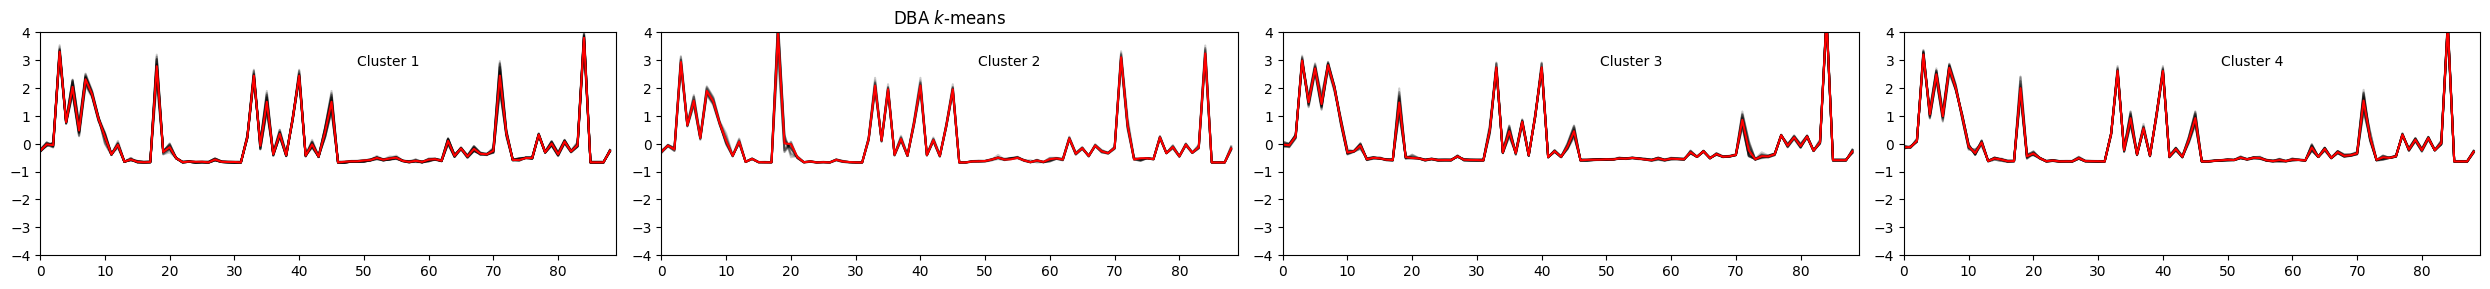

In [88]:
# DBA-k-means
print("DBA k-means")
sz = X_dtw_train_scaled.shape[1]
n_clusters = 4
dba_km = TimeSeriesKMeans(n_clusters=n_clusters,
                          n_init=2,
                          metric="dtw",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=0)

y_pred_dba_km = dba_km.fit_predict(X_dtw_train_scaled)
# print("DBA silhoutte: {:.2f}".format(silhouette_score(X_dtw_train, y_pred_dba_km, metric="dtw")))

for yi in range(n_clusters):
    plt.subplot(3, n_clusters, yi+1)
    for xx in X_dtw_train_scaled[y_pred_dba_km == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")
        


plt.tight_layout()
plt.show()

In [89]:
y_pred_dba_km, len(y_pred_dba_km)

(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1], dtype=int64),
 90)

In [90]:
# df_n = pd.DataFrame()
# df_n['Cluster'] = y_pred_dba_km

# # Group features by cluster
# clustered_features = df_n.groupby('Cluster')

# # Extract feature names for each cluster
# for cluster, features_df in clustered_features:
#     feature_names = features_df.drop('Cluster', axis=1).columns.tolist()
#     print(f"Cluster {cluster}: Features - {feature_names}")

### K-Means (mine) [using only 'dtw' and not Time Series KMeans]

In [91]:
X_km = df_quarterly.drop(columns= ['Real GDP at Market Prices'])
y_km = df_quarterly['Real GDP at Market Prices']

X_train_km, y_train_km = X_km[:-16], y_km[:-16]
X_test_km, y_test_km = X_km[-16:], y_km[-16:]

In [92]:
sc_km = StandardScaler()
X_train_km_scaled = sc_km.fit_transform(X_train_km)
X_test_km_scaled = sc_km.transform(X_test_km)

In [93]:
X_train_km_scaled = pd.DataFrame(X_train_km_scaled, index =X_train_km.index , columns= X_train_km.columns)
X_test_km_scaled = pd.DataFrame(X_test_km_scaled, index =X_test_km.index , columns= X_test_km.columns)

In [94]:
inertia = []
K = range(1,18)
for k in K:
    km = TimeSeriesKMeans(n_clusters=k,
                          n_init=2,
                          metric="dtw",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=0,
                          init= 'k-means++')
    
    km = km.fit(X_train_km_scaled)
    inertia.append(km.inertia_)

In [95]:
for i in zip(K, inertia):
    print(i)

(1, 23.857757725664396)
(2, 16.66930939204967)
(3, 12.709828728749793)
(4, 11.003186607943224)
(5, 10.082884147571548)
(6, 8.919506117387508)
(7, 8.483275494011643)
(8, 7.908472692870209)
(9, 7.18567165822538)
(10, 7.159452221667144)
(11, 6.640364149282504)
(12, 6.35420017040104)
(13, 5.89529909273936)
(14, 5.801698902974175)
(15, 5.307919520062579)
(16, 5.196290146156019)
(17, 5.315983626159995)


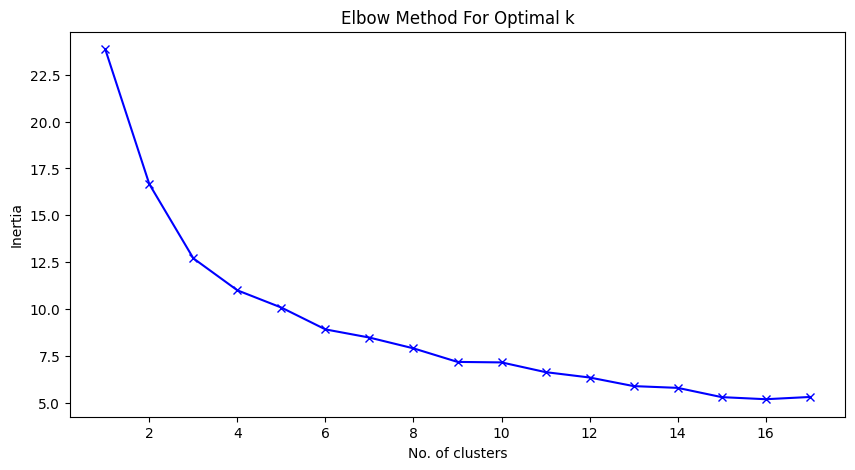

In [96]:
plt.figure(figsize= (10,5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [97]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Sample data (replace with your own data)
data = X_train_km_scaled

# Specify a range of cluster numbers to try
cluster_range = range(2, 16)

best_score = -1  # Initialize with a low value
best_num_clusters = None

for num_clusters in cluster_range:
    kmeans = TimeSeriesKMeans(n_clusters=num_clusters, random_state=0, metric= 'dtw', init= 'k-means++')
    cluster_labels = kmeans.fit_predict(data)
    
    # Calculate the silhouette score for this clustering
    score = silhouette_score(data, cluster_labels)
    
    print(f"Number of clusters: {num_clusters}, Silhouette Score: {score}")
    
    # Update the best number of clusters if the score is higher
    if score > best_score:
        best_score = score
        best_num_clusters = num_clusters

print(f"Best number of clusters: {best_num_clusters}, Best Silhouette Score: {best_score}")

Number of clusters: 2, Silhouette Score: 0.4234347435625525
Number of clusters: 3, Silhouette Score: 0.3851585958821877
Number of clusters: 4, Silhouette Score: 0.25283640717508926
Number of clusters: 5, Silhouette Score: 0.22953414985983678
Number of clusters: 6, Silhouette Score: 0.19396538292842208
Number of clusters: 7, Silhouette Score: 0.2117641250442368
Number of clusters: 8, Silhouette Score: 0.17818674914027335
Number of clusters: 9, Silhouette Score: 0.22241031543596598
Number of clusters: 10, Silhouette Score: 0.18213105729793141
Number of clusters: 11, Silhouette Score: 0.17437278893063643
Number of clusters: 12, Silhouette Score: 0.1885463232813218
Number of clusters: 13, Silhouette Score: 0.178978145133826
Number of clusters: 14, Silhouette Score: 0.17734587245264274
Number of clusters: 15, Silhouette Score: 0.1664392933696508
Best number of clusters: 2, Best Silhouette Score: 0.4234347435625525


In [98]:
# data= X_train_km_scaled
# kmeans = KMeans(n_clusters=2)
# kmeans.fit(data)

# plt.scatter(x, y, c=kmeans.labels_)
# plt.show()
n_clusters = 2
clusterer = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = clusterer.fit_predict(X_train_km_scaled)
centers = clusterer.cluster_centers_

c:\Users\himanshu.verma\anaconda3\envs\time_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [99]:
centers

array([[-0.70215957, -0.82307405, -0.69253945, -0.78859848, -0.76901196,
        -0.75699024,  0.35524401, -0.77043162, -0.77406875, -0.75444881,
        -0.81315606, -0.77992595, -0.66678521, -0.6760438 , -0.65298336,
         0.70082293,  0.14179424, -0.25945843, -0.71787192, -0.65416797,
        -0.76893589, -0.74088738, -0.68475915, -0.49181805,  0.53875688,
        -0.56801331,  0.76047965, -0.52512099, -0.64184455, -0.7045286 ,
         0.12238799,  0.06853752, -0.7887866 , -0.78487603, -0.75850978,
        -0.76901827, -0.76427722, -0.75628584, -0.75962912, -0.78066124,
        -0.78487603, -0.77004441, -0.7641627 , -0.74618979, -0.76897038,
        -0.76901827,  0.23808536,  0.25375089, -0.73414189, -0.65049457,
        -0.58150591, -0.75254508, -0.69303   , -0.7307953 , -0.67912376,
        -0.74539095, -0.72775837, -0.38929112, -0.54546236, -0.56975386,
        -0.56314467, -0.79351246, -0.66030036, -0.78321745, -0.74740491,
        -0.75776001, -0.79604013, -0.76295483, -0.7